In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TASK 1. DATA PREPARATION

In [2]:
nba= pd.read_csv('NBA_players_stats.csv', sep=',', decimal='.')
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [3]:
nba.shape

(512, 29)

In [4]:
nba.info()
# there are 4 columns that have missing values which are FG%, 3P%, 2P% AMD FT%.
# the rest of the columns have no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      512 non-null    int64  
 1   Player  512 non-null    object 
 2   Pos     512 non-null    object 
 3   Age     512 non-null    int64  
 4   Tm      512 non-null    object 
 5   G       512 non-null    int64  
 6   GS      512 non-null    int64  
 7   MP      512 non-null    int64  
 8   FG      512 non-null    int64  
 9   FGA     512 non-null    int64  
 10  FG%     509 non-null    float64
 11  3P      512 non-null    int64  
 12  3PA     512 non-null    int64  
 13  3P%     479 non-null    float64
 14  2P      512 non-null    int64  
 15  2PA     512 non-null    int64  
 16  2P%     505 non-null    float64
 17  FT      512 non-null    int64  
 18  FTA     512 non-null    int64  
 19  FT%     480 non-null    float64
 20  ORB     512 non-null    int64  
 21  DRB     512 non-null    int64  
 22  TR

1.1 Rk

In [5]:
# checking range
print('min:', nba['Rk'].min())
print('max:', nba['Rk'].max())
print('data set has 512 entries of 495 players in Rk. There is no error in Rk')

min: 1
max: 492
data set has 512 entries of 495 players in Rk. There is no error in Rk


1.2 Players

In [6]:
nba['Player']

0       Precious Achiuwa
1           Jaylen Adams
2           Steven Adams
3            Bam Adebayo
4      LaMarcus Aldridge
             ...        
507         Delon Wright
508       Thaddeus Young
509           Trae Young
510          Cody Zeller
511          Ivica Zubac
Name: Player, Length: 512, dtype: object

1.3 Pos

In [7]:
# sanity check
print(nba['Pos'].value_counts())
print('there are extra white spaces and typos in Pos')

SG        117
PF        102
C          98
PG         92
SF         83
SG          3
 PG         3
C           2
Pg          1
 SG         1
sg          1
Sf          1
SF-PF       1
 SF         1
SGa         1
pg          1
SF.         1
PFa         1
PF          1
PG-SG       1
Name: Pos, dtype: int64
there are extra white spaces and typos in Pos


In [8]:
# stripping white spaces
nba['Pos'] = nba['Pos'].str.strip()
print(nba['Pos'].value_counts())
print('there were 6 extra white space errors in Pos')

SG       121
PF       103
C        100
PG        95
SF        84
Sf         1
PG-SG      1
PFa        1
pg         1
SGa        1
SF-PF      1
SF.        1
sg         1
Pg         1
Name: Pos, dtype: int64
there were 6 extra white space errors in Pos


In [9]:
#fixing typos
nba['Pos'] = nba['Pos'].str.upper()#converting characters to upper case
nba['Pos'].value_counts()

SG       122
PF       103
C        100
PG        97
SF        85
PG-SG      1
SF-PF      1
PFA        1
SF.        1
SGA        1
Name: Pos, dtype: int64

In [10]:
# fixing typos
mask_PFa = nba['Pos'] == 'PFA'
nba.loc[mask_PFa, 'Pos'] = 'PF' # PFa to PF

mask_SGa = nba['Pos'] == 'SGA'
nba.loc[mask_SGa, 'Pos'] = 'SG'#SGa to SG

mask_SFdot = nba['Pos'] == 'SF.'
nba.loc[mask_SFdot, 'Pos'] = 'SF' # SF.  to SF
print(nba['Pos'].value_counts())
print('there were 7 typos in Pos')

SG       123
PF       104
C        100
PG        97
SF        86
PG-SG      1
SF-PF      1
Name: Pos, dtype: int64
there were 7 typos in Pos


1.4 Age

In [11]:
# Sanity check
print(nba['Age'].unique())
print('there are 2 impossible values in Age')

[ 21  24  27  23  35  22  25  30  26  28  36  20  33  19  32  34  31  29
 280 -19  37]
there are 2 impossible values in Age


In [12]:
mask_age_280 = nba['Age'] == 280
mask_age_minus19 = nba['Age'] == (-19)
print(nba.loc[mask_age_minus19 | mask_age_280 , ['Player', 'Age']])

            Player  Age
162   Anthony Gill  280
197  Killian Hayes  -19


In [13]:
# fixing impossible values
nba['Age'].replace(280, 28, inplace=True)
nba['Age'].replace(-19, 19, inplace=True)
nba['Age'].unique()

array([21, 24, 27, 23, 35, 22, 25, 30, 26, 28, 36, 20, 33, 19, 32, 34, 31,
       29, 37], dtype=int64)

1.5 Tm

In [14]:
print(nba['Tm'].value_counts())

BRK     19
WAS     18
SAC     18
HOU     18
CLE     17
LAL     17
DET     17
TOR     17
NYK     17
DAL     17
CHI     17
DEN     17
MIN     16
ATL     16
ORL     16
UTA     16
PHO     15
MIA     15
OKC     15
BOS     15
LAC     15
SAS     14
IND     14
POR     14
MEM     14
GSW     14
MIL     14
CHO     14
NOP     14
PHI     14
TOT      9
BRK      3
 PHI     3
 IND     2
DET      1
MIA      1
GSW      1
 ORL     1
OKC      1
MIL      1
H0U      1
SAS      1
 PHO     1
 WAS     1
CLE      1
IND      1
 BOS     1
 BRK     1
 SAS     1
 MEM     1
 TOT     1
NyK      1
MEM      1
ORL      1
 NOP     1
Name: Tm, dtype: int64


In [15]:
# stripping white space errors
#'Tm had 22 extra white space errors in Tm
nba['Tm'] = nba['Tm'].str.strip()
print(nba['Tm'].value_counts())

BRK    23
WAS    19
DET    18
SAC    18
ORL    18
CLE    18
HOU    18
CHI    17
NYK    17
LAL    17
DEN    17
PHI    17
IND    17
TOR    17
DAL    17
MEM    16
BOS    16
SAS    16
MIN    16
PHO    16
ATL    16
MIA    16
UTA    16
OKC    16
NOP    15
MIL    15
LAC    15
GSW    15
POR    14
CHO    14
TOT    10
H0U     1
NyK     1
Name: Tm, dtype: int64


In [16]:
# fixing typos errors
# Tm had 2 typos
# H0U to HOU
mask_H0U = nba['Tm'] == 'H0U'
nba.loc[mask_H0U, 'Tm'] = 'HOU'
# NyK to NYK
mask_NyK = nba['Tm'] == 'NyK'
nba.loc[mask_NyK, 'Tm'] = 'NYK'

print(nba['Tm'].unique())


['MIA' 'MIL' 'NOP' 'SAS' 'PHO' 'MEM' 'TOT' 'BRK' 'CLE' 'ORL' 'LAL' 'POR'
 'TOR' 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN'
 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU']


1.6 G

In [17]:
# sanity check
mask_over82G = nba['G'] >82
mask_lessthan0 = nba['G'] < 0

print(nba.loc[mask_over82G | mask_lessthan0, 'G' ])
print('there is no value out of range')

Series([], Name: G, dtype: int64)
there is no value out of range


1.7 GS

In [18]:
# sanity check
mask_GS_over82 = nba['GS'] > 82
mask_GS_lessthan0 = nba['GS'] < 0

print(nba.loc[ mask_GS_over82 | mask_GS_lessthan0 , 'GS'])
print('there is no value out of range in GS')

Series([], Name: GS, dtype: int64)
there is no value out of range in GS


1.8 MP

In [19]:
# sanity check
# checking range
mask_over_G =  nba['MP'] > nba['G']*48
mask_G_lessthan0 =  nba['MP'] < 0
print(nba.loc[mask_over_G | mask_G_lessthan0, 'MP'])
print('there is no value out of range in MP')

Series([], Name: MP, dtype: int64)
there is no value out of range in MP


1.9 2P

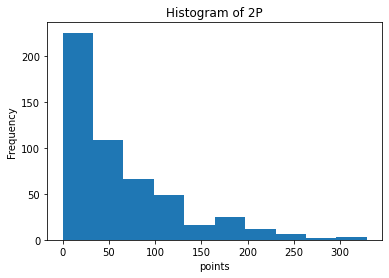

there is no outlier in 2P


In [20]:
# sanity check
nba['2P'].plot.hist( title='Histogram of 2P')
plt.xlabel('points')
plt.show()
print('there is no outlier in 2P')

1.10 3P

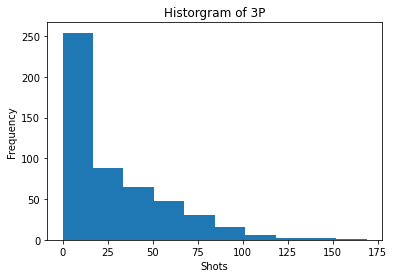

there is no outlier in 3P


In [21]:
# sanity check
nba['3P'].plot.hist(title='Historgram of 3P')
plt.xlabel('Shots')
plt.show()
print('there is no outlier in 3P')

1.11 FG

In [22]:
# sanity check
mask_invalid_FG = nba['FG'] != nba['2P'] + nba['3P']
print(mask_invalid_FG.value_counts())
print('there is no invalid value in FG')

False    512
dtype: int64
there is no invalid value in FG


1.12 2PA

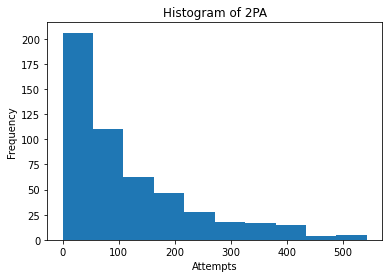

there is no outlier in 2PA


In [23]:
# sanity check
nba['2PA'].plot.hist(title='Histogram of 2PA')
plt.xlabel('Attempts')
plt.show()
print('there is no outlier in 2PA')

1.13 3PA

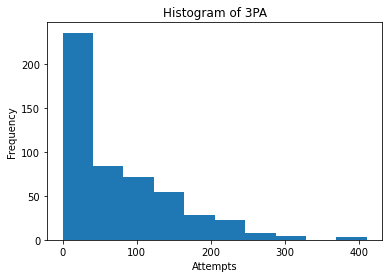

there is no outlier in 3PA


In [24]:
# sanity check
nba['3PA'].plot.hist(title='Histogram of 3PA')
plt.xlabel('Attempts')
plt.show()
print('there is no outlier in 3PA')

1.14 FGA

In [25]:
# sanity check
mask_invalid_FGA = nba['FGA'] != nba['2PA'] + nba['3PA']
print(mask_invalid_FGA.value_counts())
print('there is no invalid value in FGA')

False    512
dtype: int64
there is no invalid value in FGA


1.15 FG%

In [26]:
# missing value check
nba['FG%'].isna().value_counts()
print('there are 3 missing value in FG%')

there are 3 missing value in FG%


In [27]:
nba.loc[nba['FG%'].isna(), ['FG%', 'FG', 'FGA']]

,FG%,FG,FGA
178,NaN,0,0
190,NaN,0,0
304,NaN,0,0


In [28]:
# fill missing value with 0
nba['FG%'].fillna(0, inplace=True)
print(nba['FG%'].isna().value_counts())

False    512
Name: FG%, dtype: int64


In [29]:
# sanity check
mask_FG_per = nba['FG%'].round(3) != (nba['FG']/nba['FGA']).round(3)
nba.loc[mask_FG_per, ['FG%', 'FG', 'FGA']]
print('there is no calculation error in FG%')

there is no calculation error in FG%


1.16 3P%

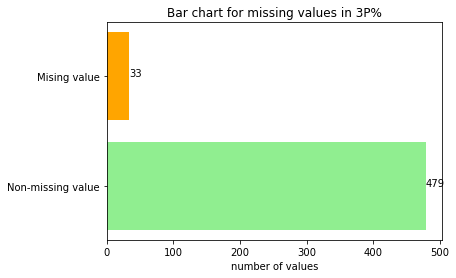

In [30]:
# cheking for missing values
import math

list_3Pper = nba['3P%'].tolist() # list values of 3P%
null_list = []
non_null_list=[]
for i in list_3Pper:
    if math.isnan(i) == True: # check missing values
        null_list.append(i) # put missing values in a null list
    else:
        non_null_list.append(i) # put non missing values in non-null list
x = ['Non-missing value', 'Mising value'] # label for missing/non missing values
y = [len(non_null_list), len(null_list)] # values of columns are the length of lists
fig, ax = plt.subplots() 
ax.barh(x, y, color = ['lightgreen','orange'])
for i, v in enumerate(y): # label values for each column
    ax.text(v , i , str(v), 
            color = 'black')
plt.xlabel('number of values')
plt.title('Bar chart for missing values in 3P%')
plt.show()

In [31]:
nba.loc[nba['3P%'].isna(), ['3P%', '3P', '3PA']]

,3P%,3P,3PA
0,NaN,0,0
9,NaN,0,0
14,NaN,0,0
23,NaN,0,0
45,NaN,0,0
55,NaN,0,0
60,NaN,0,0
64,NaN,0,0
71,NaN,0,0
81,NaN,0,0


In [32]:
# fill missing value by 0
nba['3P%'].fillna(0, inplace = True)
nba.loc[nba['3P%'].isna(), '3P%']

Series([], Name: 3P%, dtype: float64)

In [33]:
# checking for calculation errors
mask_3Pper= nba['3P%'].round(3) != (nba['3P']/nba['3PA']).round(3)
nba.loc[mask_3Pper, ['3P%', '3P', '3PA']]

,3P%,3P,3PA
0,0.000,0,0
3,0.050,2,6
8,0.050,4,8
9,0.000,0,0
14,0.000,0,0
23,0.000,0,0
25,0.730,34,92
45,0.000,0,0
55,0.000,0,0
56,0.313,10,32


In [34]:
# sanity check-calculation errors
calculation = nba.loc[mask_3Pper, ['3P%', '3P', '3PA']].copy() # extract missmatched-calculation, save them in a new dataset
calculation['3P/3PA'] = (nba['3P']/nba['3PA']).round(3)
calculation[['3P%', '3P/3PA','3P', '3PA']]

,3P%,3P/3PA,3P,3PA
0,0.000,NaN,0,0
3,0.050,0.333,2,6
8,0.050,0.500,4,8
9,0.000,NaN,0,0
14,0.000,NaN,0,0
23,0.000,NaN,0,0
25,0.730,0.370,34,92
45,0.000,NaN,0,0
55,0.000,NaN,0,0
56,0.313,0.312,10,32


In [35]:
# fill nan in missmatched-calculation data by 0
calculation.fillna(0, inplace=True) 

In [36]:
# finding the calculation error 
# round up to 2 decimals in 3P% and 3P/3PA
mask_calculation_round2 = calculation['3P/3PA'].round(2) != calculation['3P%'].round(2) 
mask_calculation_round2.value_counts()

False    35
True      3
dtype: int64

Text(0.5, 0, 'number of values')

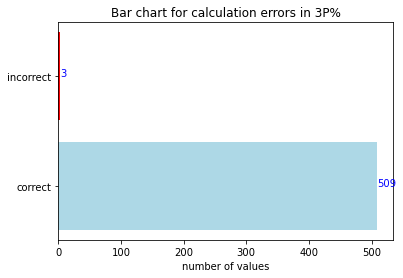

In [37]:
# visualizing calculation errors
data_3Pper = len(nba['3P%'])
errors = len(calculation.loc[mask_calculation_round2, '3P%'])
label = ['correct', 'incorrect'] # values of columns are the length of lists
values = [data_3Pper - errors, errors]
fig, ax = plt.subplots() 
ax.barh(label, values, color=['lightblue', 'red'])
for i, v in enumerate(values): # label values for each column
    ax.text(v , i,str(v), 
            color = 'blue')
plt.title('Bar chart for calculation errors in 3P%')
plt.xlabel('number of values')

In [38]:
# checking calculation errors by round up to 2 decimals
mask_calculation_round2
calculation.loc[mask_calculation_round2, ['3P%', '3P/3PA','3P', '3PA']]

,3P%,3P/3PA,3P,3PA
3,0.05,0.333,2,6
8,0.05,0.500,4,8
25,0.73,0.370,34,92


In [39]:
# fix the calculation errors
nba.loc[3, '3P%'] = (nba.loc[3, '3P']/nba.loc[3, '3PA']).round(3)
nba.loc[8, '3P%'] = (nba.loc[8, '3P']/nba.loc[8, '3PA']).round(3)
nba.loc[25, '3P%'] = (nba.loc[25, '3P']/nba.loc[25, '3PA']).round(3)
nba.loc[[3,8,25], ['3P%', '3P', '3PA']]

,3P%,3P,3PA
3,0.333,2,6
8,0.500,4,8
25,0.370,34,92


1.17 2P%

In [40]:
# missing value
print(nba['2P%'].isna().value_counts())

print('There are 7 missing values in 2P%')

False    505
True       7
Name: 2P%, dtype: int64
There are 7 missing values in 2P%


In [41]:
nba.loc[nba['2P%'].isna(), ['2P%', '2P', '2PA']]

,2P%,2P,2PA
178,NaN,0,0
190,NaN,0,0
274,NaN,0,0
304,NaN,0,0
370,NaN,0,0
435,NaN,0,0
492,NaN,0,0


In [42]:
# fill nan by 0
nba['2P%'].fillna(0, inplace=True)
nba['2P%'].isna().value_counts()

False    512
Name: 2P%, dtype: int64

In [43]:
# sanity check-calculation error
mask_2Pper =nba['2P%'].round(3) != (nba['2P']/nba['2PA']).round(3)
nba.loc[mask_2Pper , ['2P%', '2P', '2PA']]
print('there is no calculation error in 2P%')

there is no calculation error in 2P%


1.18 FT

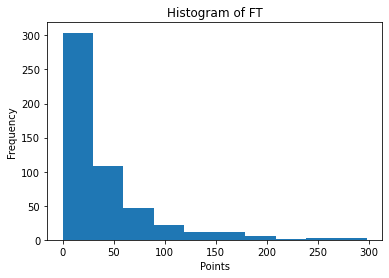

There is no value out of range in FT


In [44]:
# sanity check-outlier
nba['FT'].plot.hist(title='Histogram of FT')
plt.xlabel('Points')
plt.show()
print('There is no value out of range in FT')

1.19 FTA

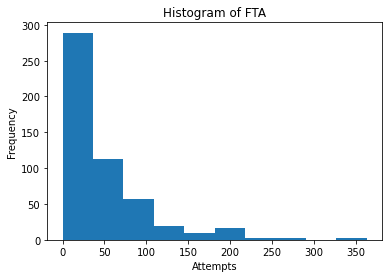

There is no value out of range
                    Player  FTA
13   Giannis Antetokounmpo  363
133            Joel Embiid  348
509             Trae Young  328


In [45]:
# sanity check - outlier
nba['FTA'].plot.hist(title='Histogram of FTA')
plt.xlabel('Attempts')
plt.show()
print('There is no value out of range')
print(nba.loc[nba['FTA'] > 300, ['Player', 'FTA']])

1.20 FT%

In [46]:
# checking missing value
print(nba['FT%'].isna().value_counts())

print('There are 32 missing values in FT%')

False    480
True      32
Name: FT%, dtype: int64
There are 32 missing values in FT%


In [47]:
nba.loc[nba['FT%'].isna(), ['FT%', 'FT', 'FTA']]

,FT%,FT,FTA
1,NaN,0,0
5,NaN,0,0
40,NaN,0,0
51,NaN,0,0
56,NaN,0,0
63,NaN,0,0
103,NaN,0,0
122,NaN,0,0
127,NaN,0,0
140,NaN,0,0


In [48]:
# fill nan by 0
nba['FT%'].fillna(0, inplace = True)
nba['FT%'].isna().value_counts()

False    512
Name: FT%, dtype: int64

In [49]:
# sanity check-calculation mistake
mask_FTper = nba['FT%'].round(3) != (nba['FT']/nba['FTA']).round(3)
print(nba.loc[mask_FTper, ['FT%', 'FT', 'FTA']])
print('there is no calculation error in FT%')

       FT%  FT  FTA
1    0.000   0    0
5    0.000   0    0
40   0.000   0    0
51   0.000   0    0
56   0.000   0    0
63   0.000   0    0
103  0.000   0    0
122  0.000   0    0
127  0.000   0    0
140  0.000   0    0
149  0.000   0    0
151  0.000   0    0
165  0.613  49   80
178  0.000   0    0
190  0.000   0    0
226  0.000   0    0
233  0.000   0    0
261  0.000   0    0
304  0.000   0    0
326  0.000   0    0
368  0.000   0    0
370  0.000   0    0
377  0.000   0    0
380  0.000   0    0
384  0.000   0    0
397  0.000   0    0
402  0.000   0    0
430  0.000   0    0
442  0.000   0    0
460  0.000   0    0
474  0.000   0    0
486  0.000   0    0
492  0.000   0    0
there is no calculation error in FT%


1.21 ORB 

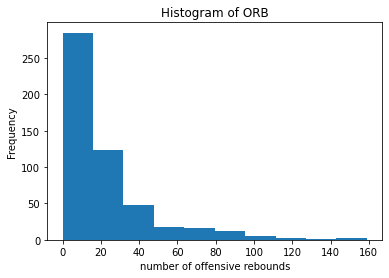

There is no value out of range


In [50]:
# sanity check-outlier
nba['ORB'].plot.hist(title='Histogram of ORB')
plt.xlabel('number of offensive rebounds')
plt.show()
print('There is no value out of range')

1.22 DRB

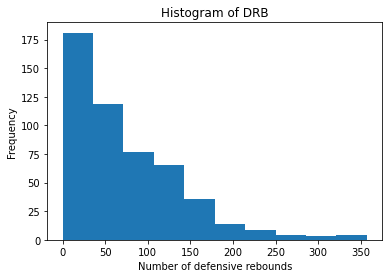

There is no value out of range


In [51]:
# sanity check - outlier
nba['DRB'].plot.hist(title = 'Histogram of DRB')
plt.xlabel('Number of defensive rebounds')
plt.show()

print('There is no value out of range')

1.23 TRB

In [52]:
# sanity check - unmatch values
print(nba.loc[nba['TRB'] != nba['ORB'] + nba['DRB'], 'TRB'])
print('there is no impossible value in TBR')

Series([], Name: TRB, dtype: int64)
there is no impossible value in TBR


1.24 AST

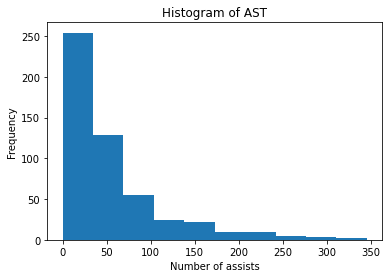

There is no value out of range


In [53]:
# sanity check - outlier
nba['AST'].plot.hist(title='Histogram of AST')
plt.xlabel('Number of assists')
plt.show()
print('There is no value out of range')

1.25 STL

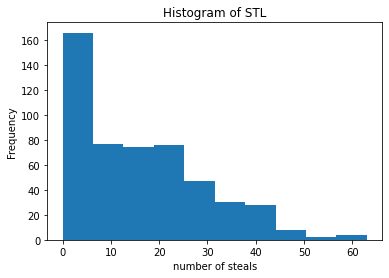

There is no value out of range


In [54]:
# sanity check - outlier
nba['STL'].plot.hist(title='Histogram of STL')
plt.xlabel('number of steals')
plt.show()
print('There is no value out of range')

1.26 BLK

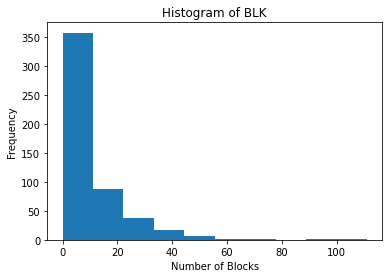

there is no value out of range


In [55]:
# sanity check-outlier
nba['BLK'].plot.hist(title='Histogram of BLK')
plt.xlabel('Number of Blocks')
plt.show()
print('there is no value out of range')

1.27 TOV

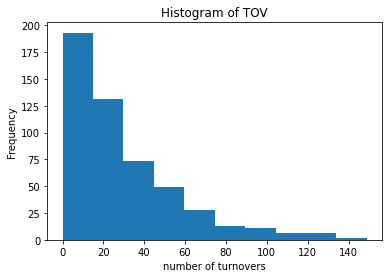

there is no value out of range


In [56]:
# sanity check-outlier
nba['TOV'].plot.hist(title='Histogram of TOV')
plt.xlabel('number of turnovers')
plt.show()
print('there is no value out of range')

1.28 PF

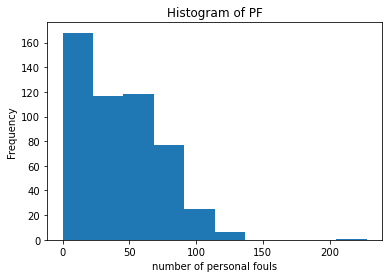

There is a potential outlier in PF


In [57]:
# sanity check-outlier
nba['PF'].plot.hist(title='Histogram of PF')
plt.xlabel('number of personal fouls')
plt.show()
print('There is a potential outlier in PF')

In [58]:
# checking for players have more than 6 personal fouls in one game
(nba['PF'] > nba['G']*6).value_counts()

False    512
dtype: int64

In [59]:
# sanity check 
print(nba.loc[nba['PF'] > 200, ['Player', 'PF', 'G']])
print('there is no impossible value in PF')

          Player   PF   G
511  Ivica Zubac  228  38
there is no impossible value in PF


1.29 PTS

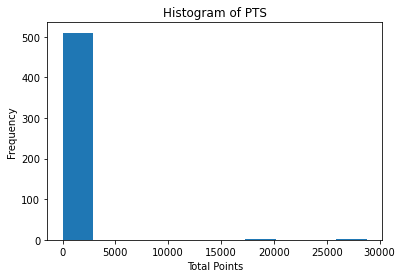

there are two outliers in PTS


In [60]:
# outlier check
nba['PTS'].plot.hist(title='Histogram of PTS')
plt.xlabel('Total Points')
plt.show()
print('there are two outliers in PTS')

In [61]:
nba.loc[nba['PTS']>= 2000, ['Player', 'PTS', '2P', '3P', 'FT']]

,Player,PTS,2P,3P,FT
1,Jaylen Adams,20000,1,0,0
4,LaMarcus Aldridge,28800,88,27,31


In [62]:
# filling the outlier by 2P, 3P and FT value
nba.loc[nba['PTS'] >=2000, 'PTS']  = nba['2P']*2 + nba['3P']*3 + nba['FT']
nba.loc[[1,4], ['PTS', '2P', '3P', 'FT']]

,PTS,2P,3P,FT
1,2,1,0,0
4,288,88,27,31


In [63]:
#Save cleaned data
nba.to_csv('cleaned_NBA_players_stats.csv', index=False)

TASK 2. DATA EXPLORATION

2.1 analyzing top five players

In [64]:
# group data by Rk and sort by PTS. Players'PTS whom played for more than one time, are sum of PTS for teams played
grouped_nba = nba.groupby(['Rk']).sum().sort_values(by='PTS', ascending=False)
grouped_nba

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
182,93,62,62,2346,500,1034,1.425,202,504,1.170,...,2.592,52,432,484,690,72,42,262,134,1568
37,27,32,32,1143,368,764,0.482,74,221,0.335,...,0.903,43,131,174,151,44,14,105,82,1053
109,32,35,35,1194,343,718,0.478,169,411,0.411,...,0.934,17,174,191,221,46,2,111,64,1039
12,26,35,35,1189,368,661,0.557,39,137,0.285,...,0.661,64,344,408,205,44,49,128,106,1015
268,30,34,34,1224,315,708,0.445,146,380,0.384,...,0.933,15,130,145,271,35,9,111,53,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,23,4,0,12,0,3,0.000,0,1,0.000,...,0.000,1,4,5,1,0,0,0,0,0
295,25,3,0,20,0,0,0.000,0,0,0.000,...,0.000,1,0,1,4,0,0,0,3,0
177,21,2,0,4,0,0,0.000,0,0,0.000,...,0.000,0,0,0,0,0,0,1,0,0


In [65]:
# extract top five players
top_five = grouped_nba[['2P', '3P', 'FT', 'PTS']].head().copy()
top_five

,2P,3P,FT,PTS
Rk,,,,
182,298,202,366,1568
37,294,74,243,1053
109,174,169,184,1039
12,329,39,240,1015
268,169,146,237,1013


In [66]:
# find the player names
r182 = nba['Rk'] == 182
print(nba.loc[r182, 'Player'])
r37 = nba['Rk'] == 37
print(nba.loc[r37, 'Player'])
r109 = nba['Rk'] == 109
print(nba.loc[r109, 'Player'])
r12= nba['Rk'] == 12
print(nba.loc[r12, 'Player'])
r268 = nba['Rk'] == 268
print(nba.loc[r268, 'Player'])

183    James Harden
184    James Harden
185    James Harden
Name: Player, dtype: object
38    Bradley Beal
Name: Player, dtype: object
110    Stephen Curry
Name: Player, dtype: object
13    Giannis Antetokounmpo
Name: Player, dtype: object
277    Damian Lillard
Name: Player, dtype: object


In [67]:
# mean of each shot
print('2P mean:', top_five['2P'].mean())
print('3P mean:', top_five['3P'].mean())
print('FT mean:', top_five['FT'].mean())

2P mean: 252.8
3P mean: 126.0
FT mean: 254.0


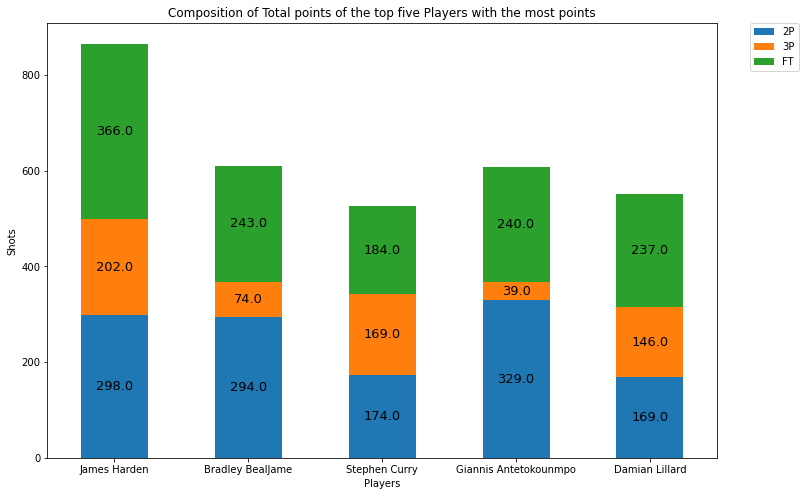

In [68]:
# create dataframe for top 5 players
p2 = top_five['2P'].tolist()
p3 = top_five['3P'].tolist()
ft= top_five['FT'].tolist()
index = ['James Harden', 'Bradley BealJame','Stephen Curry', 'Giannis Antetokounmpo', 'Damian Lillard']
df = pd.DataFrame({'2P':p2, '3P' : p3, 'FT': ft}, index=index)

ax = df.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = height 
    # ax.text(x, y, text)
    label_x= x + width / 2
    label_y= y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=13)
    
ax.legend( bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)   
ax.set_ylabel("Shots", fontsize=10)
ax.set_xlabel("Players", fontsize=10)
plt.title('Composition of Total points of the top five Players with the most points')
plt.show()

In [69]:
# summary statistic of composition of total points of top five players
describe_df = df.describe()
describe_df.loc[['mean', 'min', 'max'], :]

,2P,3P,FT
mean,252.8,126.0,254.0
min,169.0,39.0,184.0
max,329.0,202.0,366.0


2.2 Find errors in 3P, 3P% and 3PA  by visualization are done in data prepration. There are 33 missing values and 3 calculation mistakes in 3P%. Missing values are filled by 0 and calculation mistakes are replaced by results of division of 3P and 3PA.

2.3 Analyzing the relationship between PTS to STL, MP and TOV

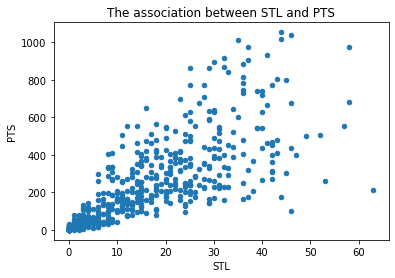

Correlation 0.7602493300092283
the graph showed a positive, weak linear relationship between STL and PTS.PTS increased when STL increased. However, not all PTS's players followed this trend.
There were outliers where some players had the same amount of steals but having different total points


In [70]:
# the association between STL and PTS
nba.plot.scatter(x='STL', y='PTS', title='The association between STL and PTS')
plt.show()
correlation_STL = nba['STL'].corr(nba['PTS'])
print('Correlation', correlation_STL)
print('the graph showed a positive, weak linear relationship between STL and PTS.', end='')
print('PTS increased when STL increased. However, not all PTS\'s players followed this trend.')
print('There were outliers where some players had the same amount of steals but having different total points')

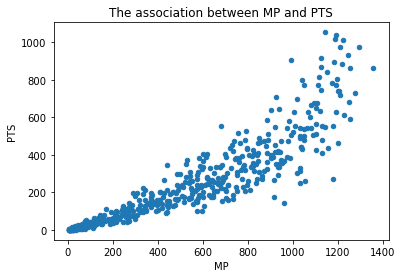

Correlation 0.9011949335859648
the graph described a positive strong nonlinear relationship between MP and PTS
PTS increased when MP increased.


In [71]:
# the association between MP and PTS
nba.plot.scatter(x='MP', y='PTS', title='The association between MP and PTS')
plt.show()
correlation_MP_PTS = nba['MP'].corr(nba['PTS'])
print('Correlation', correlation_MP_PTS)
print('the graph described a positive strong nonlinear relationship between MP and PTS')
print('PTS increased when MP increased.')

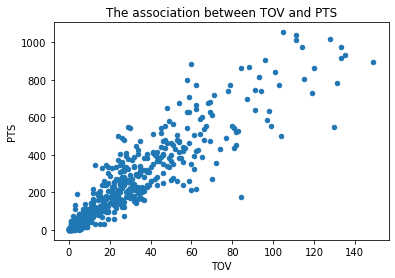

Correlation 0.907573260698202
The graph described a positive, very strong linear relationship between TOV and PTS.
More than half of player's PTS and TOV distributed in the bottom left of the graph.
In short, PTS of players increased when their TOV increased


In [72]:
# the association between TOV and PTS
nba.plot.scatter(x='TOV', y='PTS', title='The association between TOV and PTS')
plt.show()
correlation_TOV_PTS = nba['TOV'].corr(nba['PTS'])
print('Correlation', correlation_TOV_PTS)
print('The graph described a positive, very strong linear relationship between TOV and PTS.')
print('More than half of player\'s PTS and TOV distributed in the bottom left of the graph.')
print('In short, PTS of players increased when their TOV increased')